<a href="https://colab.research.google.com/github/shreevaishnavim/Neural-network-and-deep-learning/blob/main/Shree_NEURAL_NETWORK-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basic Spam Detection Neural-Network Program

In [ ]:
import math

# Input features
x = [1, 0, 1]

# Hidden layer weights
h1 = [0.5, -0.2, 0.3]
h2 = [0.9, 0.1, -0.5]

# Output layer weights
out = [0.7, 0.2]

# Activation functions
relu = lambda z: max(0, z)
sigmoid = lambda z: 1 / (1 + math.exp(-z))

# Hidden layer outputs
h1_out = relu(x[0]*h1[0] + x[1]*h1[1] + x[2]*h1[2])
h2_out = relu(x[0]*h2[0] + x[1]*h2[1] + x[2]*h2[2])

# Output layer
out_sum = h1_out*out[0] + h2_out*out[1]
y = sigmoid(out_sum)

print("Output =", y)
print("Spam" if y > 0.5 else "Not Spam")

Output = 0.6547534606063191
Spam


Simplest TensorFlow + Keras spam detection model

In [ ]:
import tensorflow as tf
import numpy as np

# 1. Tiny dataset
texts = [
    "Win a free prize",   # spam
    "Click to claim now", # spam
    "Let's meet tomorrow" # not spam
]
labels = [1, 1, 0]

# Convert texts to dtype=object to avoid dtype issues
texts = np.array(texts, dtype=object)
labels = np.array(labels)

# 2. Text Vectorization
vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=1000,
    output_mode="int",
    output_sequence_length=10
)
vectorizer.adapt(texts)

# 3. Small Model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,), dtype=tf.string),
    vectorizer,
    tf.keras.layers.Embedding(1000, 8),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# 4. Train
model.fit(texts, labels, epochs=50, verbose=0)  # more epochs for tiny dataset

# 5. Test
test_msg = np.array(["Get free gift now"], dtype=object)  # must use dtype=object
pred = model.predict(test_msg)[0][0]

print("Output Probability:", pred)
print("Spam" if pred > 0.5 else "Not Spam")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Output Probability: 0.53385514
Spam


Spam Detection with Dataset Upload (CSV)

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

# -------------------------------
# 1. Load your Kaggle CSV dataset
# -------------------------------
# Change the path to where you saved the downloaded CSV
df = pd.read_csv("/content/spam.csv", encoding="latin-1")

# Keep only necessary columns
df = df.rename(columns={"v1": "label", "v2": "text"})
df = df[["text", "label"]]

# Convert labels to numeric: 1 = spam, 0 = not spam
df["label"] = (df["label"].str.lower() == "spam").astype(int)

texts = df["text"].tolist()
labels = df["label"].tolist()

# -------------------------------
# 2. Text Vectorization
# -------------------------------
max_words = 5000
max_len = 20

vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=max_words,
    output_mode='int',
    output_sequence_length=max_len
)
vectorizer.adapt(texts)

# -------------------------------
# 3. Build the Model
# -------------------------------
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,), dtype=tf.string),
    vectorizer,
    tf.keras.layers.Embedding(max_words, 16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# -------------------------------
# 4. Train the Model
# -------------------------------
model.fit(
    np.array(texts, dtype=object),
    np.array(labels),
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

# -------------------------------
# 5. Test / Predict
# -------------------------------
test_messages = np.array([
    "Get free money now",
    "Hey, are we meeting tomorrow?"
], dtype=object)

preds = model.predict(test_messages)

for msg, prob in zip(test_messages, preds):
    print(f"Message: {msg}")
    print(f"Output Probability: {prob[0]:.3f}")
    print("Spam" if prob[0] > 0.5 else "Not Spam")
    print("-" * 40)


Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8561 - loss: 0.4501 - val_accuracy: 0.9175 - val_loss: 0.2344
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9343 - loss: 0.2220 - val_accuracy: 0.9668 - val_loss: 0.1620
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9754 - loss: 0.1414 - val_accuracy: 0.9749 - val_loss: 0.1108
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9793 - loss: 0.0929 - val_accuracy: 0.9794 - val_loss: 0.0799
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9860 - loss: 0.0638 - val_accuracy: 0.9803 - val_loss: 0.0661
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9877 - loss: 0.0416 - val_accuracy: 0.9821 - val_loss: 0.0641
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9914 - loss: 0.0332 - val_accuracy: 0.9839 - val_loss: 0.0610
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9917 - loss: 0.0286 - val_accuracy: 0.

Without training the model(basic)

In [3]:
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf # Added for tf.keras.Input

x = np.array([[1.0, 0.0, 1.0]])
model = Sequential([tf.keras.Input(shape=(3,)), Dense(2, activation='relu'), Dense(1, activation='sigmoid')])
# Corrected indices for setting weights
model.layers[0].set_weights([np.array([[0.5,0.9],[-0.2,0.1],[0.3,-0.5]]), np.zeros(2)])
model.layers[1].set_weights([np.array([[0.7],[0.2]]), np.zeros(1)])
y = model.predict(x)[0][0]

print("Output =", y, "| Spam" if y>0.5 else "| Not Spam")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Output = 0.65475345 | Spam


Neural Network for handwritten digit recognition using the MNIST dataset.(Convolutional Neural Network(CNN)MODEL)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.9122 - loss: 0.2755 - val_accuracy: 0.9872 - val_loss: 0.0409
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9865 - loss: 0.0442 - val_accuracy: 0.9874 - val_loss: 0.0422
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9913 - loss: 0.0275 - val_accuracy: 0.9879 - val_loss: 0.0383
Enter a digit (0–9): 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


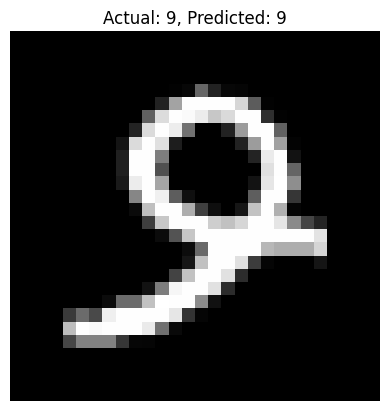

Predicted Digit: 9


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Build CNN model
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

# Ask user for a digit
user_digit = int(input("Enter a digit (0–9): "))

# Pick a random test image of that digit
indices = np.where(y_test == user_digit)[0]
random_index = np.random.choice(indices)
test_image = x_test[random_index]

# Predict
prediction = model.predict(test_image.reshape(1,28,28,1))
predicted_digit = np.argmax(prediction)

# Show result
plt.imshow(test_image.reshape(28,28), cmap="gray")
plt.title(f"Actual: {user_digit}, Predicted: {predicted_digit}")
plt.axis("off")
plt.show()

print("Predicted Digit:", predicted_digit)

Handwritten digit recognition program using a fully connected neural network (Dense layers) on the MNIST dataset.(Image,ONE Digit)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8804 - loss: 0.4220
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9650 - loss: 0.1215
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9769 - loss: 0.0768
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9830 - loss: 0.0554
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9861 - loss: 0.0439
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9731 - loss: 0.0930
Test Accuracy: 0.9763000011444092
Enter the image path (example: digit.png): /content/number-digit-4-silver-VRnnMR5-600.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Predicted Digit = 5


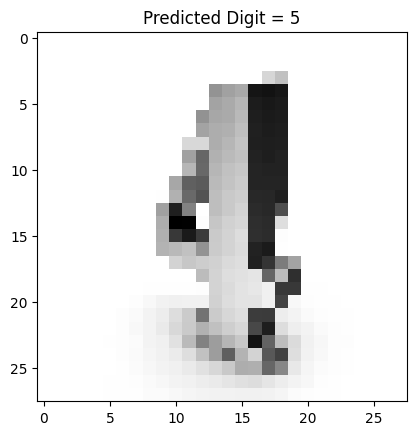

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import cv2
import numpy as np

# 1. Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# 3. Build the model
model = models.Sequential([
    tf.keras.Input(shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 4. Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train
model.fit(x_train, y_train, epochs=5)

# 6. Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

# ---------- USER INPUT PART ----------
# User gives the image path
img_path = input("Enter the image path (example: digit.png): ")

# Load the image
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Resize to 28x28
img = cv2.resize(img, (28, 28))

# Normalize
img = img / 255.0

# Convert to array shape (1, 28, 28)
img = np.array(img).reshape(1, 28, 28)

# Predict
prediction = model.predict(img)
predicted_digit = prediction.argmax()

print("Predicted Digit =", predicted_digit)

# Show the image
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title("Predicted Digit = " + str(predicted_digit))
plt.show()

Handwritten digit recognition program using a fully connected neural network (Dense layers) on the MNIST dataset.(Image,TWO Digit)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8721 - loss: 0.4468
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9631 - loss: 0.1244
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9762 - loss: 0.0800
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9814 - loss: 0.0614
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9869 - loss: 0.0430
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9730 - loss: 0.0877
Test Accuracy: 0.9758999943733215
Enter the TWO-digit image path (example: two_digits.png): /content/32digit.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted Left Digit  = 3
Predicted Right Digit = 3


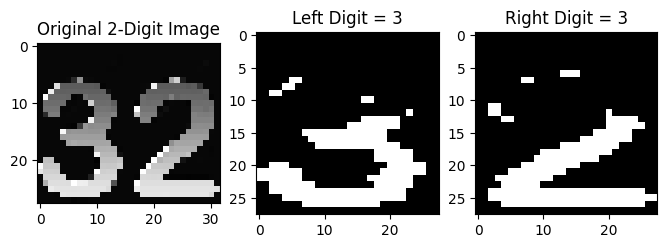

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import cv2
import numpy as np

# 1. Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# 3. Build the model
model = models.Sequential([
    tf.keras.Input(shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 4. Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train
model.fit(x_train, y_train, epochs=5)

# 6. Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

# ---------- USER INPUT PART ----------
img_path = input("Enter the TWO-digit image path (example: two_digits.png): ")

# Load the image in grayscale
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Resize the image to maintain aspect ratio and fit two digits side by side
height, width = img.shape

# Resize height to 28 and scale width proportionally
new_width = int(width * (28 / height))
img_resized = cv2.resize(img, (new_width, 28))

# Invert colors if background is white
if np.mean(img_resized) > 127:
    img_resized = 255 - img_resized

# Normalize
img_resized = img_resized / 255.0

# Split the image into two digits
mid = new_width // 2
left_digit = img_resized[:, :mid]
right_digit = img_resized[:, mid:]

# Resize each digit to 28x28 (MNIST standard)
left_digit = cv2.resize(left_digit, (28, 28))
right_digit = cv2.resize(right_digit, (28, 28))

# Threshold for cleaner prediction
_, left_digit = cv2.threshold(left_digit, 0.5, 1.0, cv2.THRESH_BINARY)
_, right_digit = cv2.threshold(right_digit, 0.5, 1.0, cv2.THRESH_BINARY)

# Prepare for prediction
left_digit_input = left_digit.reshape(1, 28, 28)
right_digit_input = right_digit.reshape(1, 28, 28)

# Predict
pred_left = model.predict(left_digit_input)
pred_right = model.predict(right_digit_input)

digit_left = pred_left.argmax()
digit_right = pred_right.argmax()

print("Predicted Left Digit  =", digit_left)
print("Predicted Right Digit =", digit_right)

# ---------- DISPLAY ----------
plt.figure(figsize=(8, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_resized, cmap='gray')
plt.title("Original 2-Digit Image")

plt.subplot(1, 3, 2)
plt.imshow(left_digit, cmap='gray')
plt.title("Left Digit = " + str(digit_left))

plt.subplot(1, 3, 3)
plt.imshow(right_digit, cmap='gray')
plt.title("Right Digit = " + str(digit_right))

plt.show()

Detecting Objects in Images with YOLO

Enter image path: /content/Still Life with Water Bottle and Chair.png

image 1/1 /content/Still Life with Water Bottle and Chair.png: 448x640 1 car, 1 bottle, 1 chair, 1 dining table, 466.2ms
Speed: 3.2ms preprocess, 466.2ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


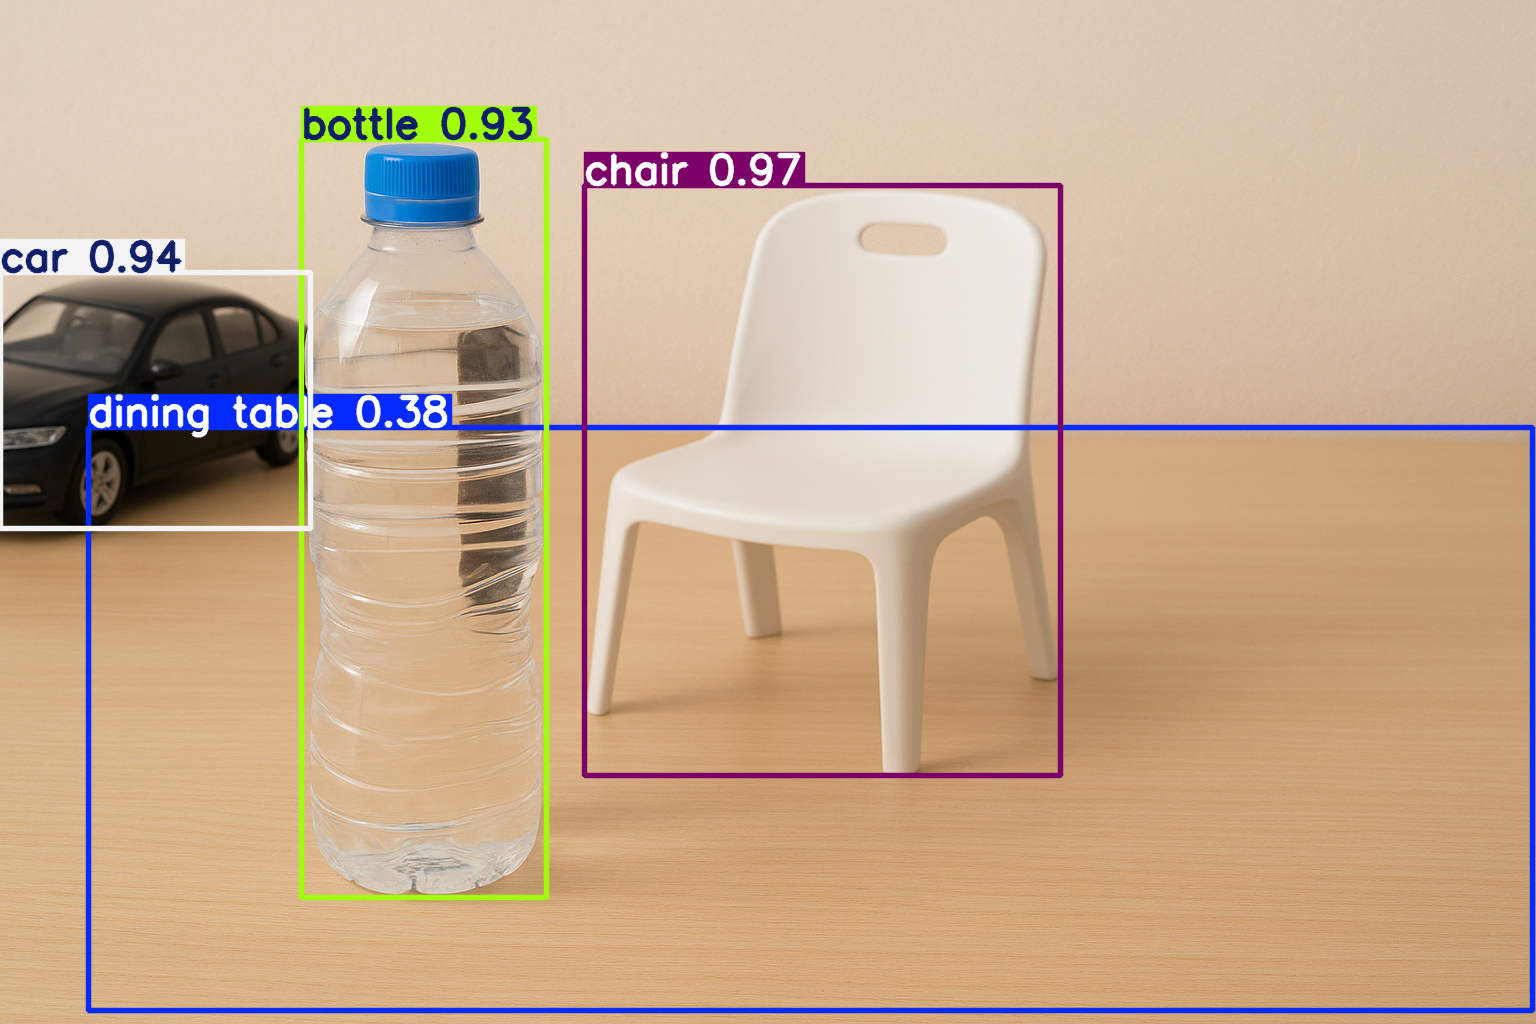


Detected Objects:
chair
car
bottle
dining table


In [ ]:
# Install YOLO (Ultralytics)
!pip install ultralytics

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load pre-trained YOLOv8 model
model = YOLO("yolov8s.pt")   # small model, fast

# Ask user for image path
img_path = input("Enter image path: ")

# Run object detection
results = model(img_path)

# Display result
results[0].show()

# Print detected objects
print("\nDetected Objects:")
for box in results[0].boxes:
    cls = int(box.cls[0])
    label = results[0].names[cls]
    print(label)


Species Identification Using Neural Networks

Enter image path: /content/peacock.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


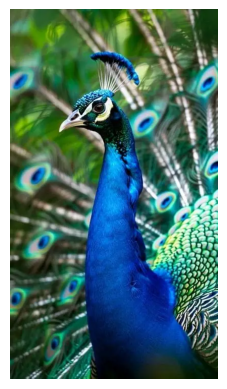


Predicted Species:
peacock: 95.89%
black_grouse: 0.07%
European_gallinule: 0.04%


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load pre-trained MobileNetV2 model
model = MobileNetV2(weights='imagenet')

# Ask user for image path
img_path = input("Enter image path: ")

# Load image
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Preprocess for model
img_resized = cv2.resize(img_rgb, (224, 224))
img_array = np.expand_dims(img_resized, axis=0)
img_array = preprocess_input(img_array)

# Predict species
preds = model.predict(img_array)
decoded_preds = decode_predictions(preds, top=3)[0]

# Display image
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

# Print predicted species (animals or birds)
print("\nPredicted Species:")
for pred in decoded_preds:
    print(f"{pred[1]}: {pred[2]*100:.2f}%")


Enter image path: /content/cat image.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


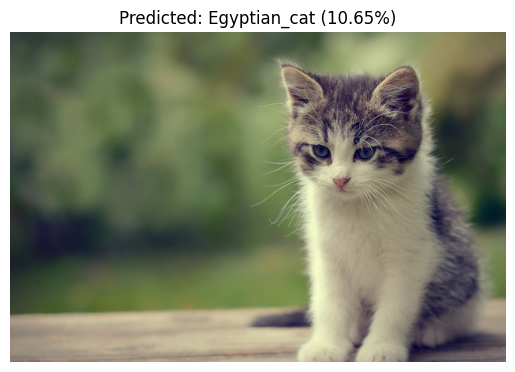

Identified Species: Egyptian_cat (10.65%)


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load pre-trained MobileNetV2 model
model = MobileNetV2(weights='imagenet')

# Ask user for image path
img_path = input("Enter image path: ")

# Load image
img = cv2.imread(img_path)
if img is None:
    print("Image not found. Check the path!")
    exit()

# Convert to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize and preprocess
img_resized = cv2.resize(img_rgb, (224, 224))
img_array = np.expand_dims(img_resized, axis=0)
img_array = preprocess_input(img_array)

# Predict species
predictions = model.predict(img_array)
decoded = decode_predictions(predictions, top=1)[0]  # top-1 prediction
species_name = decoded[0][1]
confidence = decoded[0][2]

# Display image with species name
plt.imshow(img_rgb)
plt.axis('off')
plt.title(f"Predicted: {species_name} ({confidence*100:.2f}%)")
plt.show()

# Also print in console
print(f"Identified Species: {species_name} ({confidence*100:.2f}%)")

